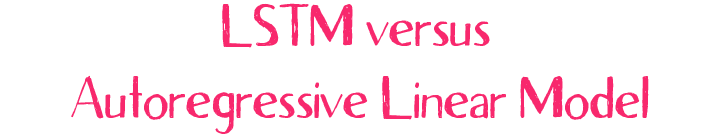

(Forecasting For complicated series. We will first try Autoregressive Linear Model and then LSTM.)

Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

from tensorflow.keras.layers import Input, SimpleRNN, GRU, LSTM, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import SGD, Adam

## ----- Section 01 Importing/ Generating Data -----

### Generating and plotting the original data

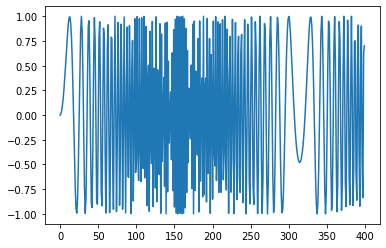

In [2]:
series = np.sin((0.1*np.arange(400))**2)

# plot it
plt.plot(series)
plt.show()

### Building the dataset

In [3]:
# let's see if we can use T past values to predict the next value
T = 10
D = 1
X = []
Y = []
for t in range(len(series) - T):
  x = series[t:t+T]
  X.append(x)
  y = series[t+T]
  Y.append(y)

X = np.array(X).reshape(-1, T) # Now the data should be N x T
Y = np.array(Y)
N = len(X)
print("X.shape", X.shape, "Y.shape", Y.shape)

X.shape (390, 10) Y.shape (390,)


## ----- Section 02 Autoregressive Linear Model -----

### Training autoregressive linear model

In [4]:
input = Input(shape=(T,))
x = Dense(1)(input)
model = Model(input, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.01),
)

# train the RNN
history = model.fit(
  X[:-N//2], Y[:-N//2],
  epochs=80,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/80
7/7 [==============================] - 1s 72ms/step - loss: 1.9388 - val_loss: 0.8518
Epoch 2/80
7/7 [==============================] - 0s 8ms/step - loss: 1.7131 - val_loss: 0.7805
Epoch 3/80
7/7 [==============================] - 0s 10ms/step - loss: 1.5532 - val_loss: 0.7272
Epoch 4/80
7/7 [==============================] - 0s 9ms/step - loss: 1.3520 - val_loss: 0.6767
Epoch 5/80
7/7 [==============================] - 0s 8ms/step - loss: 1.0958 - val_loss: 0.6389
Epoch 6/80
7/7 [==============================] - 0s 8ms/step - loss: 0.9376 - val_loss: 0.6130
Epoch 7/80
7/7 [==============================] - 0s 9ms/step - loss: 0.8565 - val_loss: 0.5921
Epoch 8/80
7/7 [==============================] - 0s 8ms/step - loss: 0.7839 - val_loss: 0.5799
Epoch 9/80
7/7 [==============================] - 0s 9ms/step - loss: 0.7064 - val_loss: 0.5653
Epoch 10/80
7/7 [==============================] - 0s 9ms/step - loss: 0.6589 - val_loss: 0.5591
Epoch 11/80
7/7 [====================

### Plotting loss per iteration

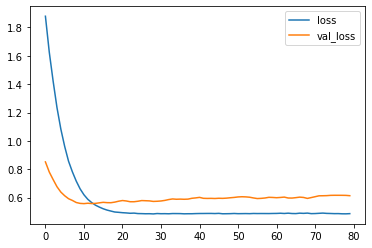

In [5]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()

### One-step forecast using true targets

(390, 1)


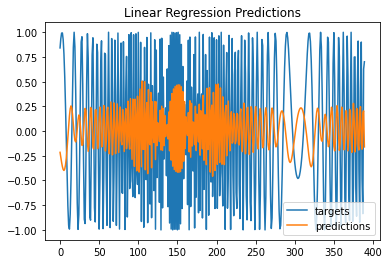

In [6]:
# Note: even the one-step forecast fails badly
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("Linear Regression Predictions")
plt.legend()
plt.show()

### Multi-step forecast

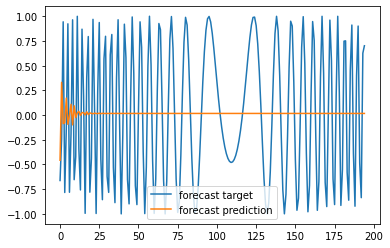

In [7]:
# Note: Multi-step forecast fails badly
validation_target = Y[-N//2:]
validation_predictions = []

# first validation input
last_x = X[-N//2] # 1-D array of length T

while len(validation_predictions) < len(validation_target):
  p = model.predict(last_x.reshape(1, -1))[0,0] # 1x1 array -> scalar
  
  # update the predictions list
  validation_predictions.append(p)
  
  # make the new input
  last_x = np.roll(last_x, -1)
  last_x[-1] = p

plt.plot(validation_target, label='forecast target')
plt.plot(validation_predictions, label='forecast prediction')
plt.legend()

## ----- Section 03 LSTM Model -----

### Training LSTM model

In [8]:
X = X.reshape(-1, T, 1) # Now the data should be N x T x D

i = Input(shape=(T, D))
x = LSTM(10)(i)
x = Dense(1)(x)
model = Model(i, x)
model.compile(
  loss='mse',
  optimizer=Adam(lr=0.05),
)

# train the LSTM
history = model.fit(
  X[:-N//2], Y[:-N//2],
  batch_size=32,
  epochs=200,
  validation_data=(X[-N//2:], Y[-N//2:]),
)

Epoch 1/200
7/7 [==============================] - 2s 81ms/step - loss: 0.5360 - val_loss: 0.5820
Epoch 2/200
7/7 [==============================] - 0s 11ms/step - loss: 0.5004 - val_loss: 0.5248
Epoch 3/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4368 - val_loss: 0.5784
Epoch 4/200
7/7 [==============================] - 0s 12ms/step - loss: 0.4291 - val_loss: 0.5685
Epoch 5/200
7/7 [==============================] - 0s 11ms/step - loss: 0.3417 - val_loss: 0.6002
Epoch 6/200
7/7 [==============================] - 0s 11ms/step - loss: 0.2792 - val_loss: 0.4820
Epoch 7/200
7/7 [==============================] - 0s 12ms/step - loss: 0.2244 - val_loss: 0.2818
Epoch 8/200
7/7 [==============================] - 0s 12ms/step - loss: 0.1834 - val_loss: 0.2310
Epoch 9/200
7/7 [==============================] - 0s 12ms/step - loss: 0.0947 - val_loss: 0.1536
Epoch 10/200
7/7 [==============================] - 0s 11ms/step - loss: 0.0766 - val_loss: 0.1428
Epoch 11/200
7/7 [=

### Plotting loss per iteration

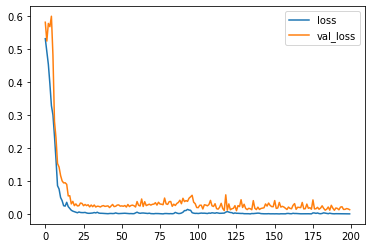

In [9]:
# plot some data
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend()
plt.show()

### One-step forecast using true targets

(390, 1)


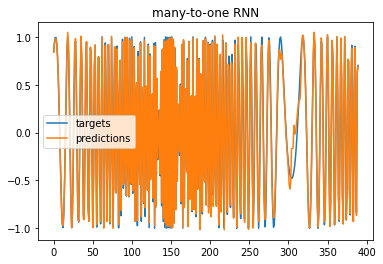

In [10]:
# One-step forecast using true targets
outputs = model.predict(X)
print(outputs.shape)
predictions = outputs[:,0]

plt.plot(Y, label='targets')
plt.plot(predictions, label='predictions')
plt.title("many-to-one RNN")
plt.legend()
plt.show()

### Multi-step forecast

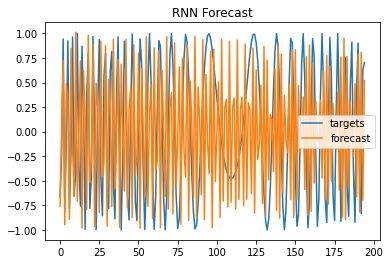

In [11]:
# Multi-step forecast
forecast = []
input_ = X[-N//2]
while len(forecast) < len(Y[-N//2:]):
  # Reshape the input_ to N x T x D
  f = model.predict(input_.reshape(1, T, 1))[0,0]
  forecast.append(f)

  # make a new input with the latest forecast
  input_ = np.roll(input_, -1)
  input_[-1] = f

plt.plot(Y[-N//2:], label='targets')
plt.plot(forecast, label='forecast')
plt.title("RNN Forecast")
plt.legend()
plt.show()

# Note: While LSTM outperforms RNN and Autoregressive Linear Model in general, they perform poorly for the given data sequence. As a result, we should test various models on given data and determine which produces the best results.